<a href="https://colab.research.google.com/github/RFankhauser/MSc_WI_BINA/blob/main/Datenanalyse_Test_Salome_V2.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from scipy.stats import pearsonr

In [31]:
# Lade die heruntergeladene CSV-Datei
df = pd.read_csv('/content/sample_data/Datensatz_komplett.csv')

# Zeige die ersten paar Zeilen der Datei an
print(df.head(10))

   LINIEN_TEXT            HALTESTELLEN_NAME         ABFAHRTSZEIT  \
0           10           Zürich, Salersteig  2024-01-01 04:36:00   
1           10         Zürich, Berninaplatz  2024-01-01 04:37:00   
2           10  Zürich, Hirschwiesenstrasse  2024-01-01 04:38:00   
3           10            Zürich, Milchbuck  2024-01-01 04:40:00   
4           10   Zürich, Universität Irchel  2024-01-01 04:41:00   
5           10     Zürich, Langmauerstrasse  2024-01-01 04:42:00   
6           10         Zürich, Letzistrasse  2024-01-01 04:43:00   
7           10        Zürich, Kinkelstrasse  2024-01-01 04:44:00   
8           10     Zürich, Sternen Oerlikon  2024-01-01 04:44:00   
9           12                    Glattpark  2024-01-01 04:45:00   

           AB_PROGNOSE AB_PROGNOSE_STATUS  VERSPAETUNG [s] WETTERSTATION  \
0  2024-01-01 04:37:09               REAL             69.0        NABZUE   
1  2024-01-01 04:38:08               REAL             68.0        NABZUE   
2  2024-01-01 04:39:12 

In [32]:
# Anzeigen der ersten 5 Zeilen des DataFrames
display(df.head(5))

,LINIEN_TEXT,HALTESTELLEN_NAME,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,VERSPAETUNG [s],WETTERSTATION,BOEENSPITZE [kmh],GLOBALSTRAHLUNG [Wm2],TEMPERATUR [°C],NIEDERSCHLAG [mm],WINDGESCHWINDIGKEIT [kmh],NEUSCHNEEHOEHE [cm],SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm],TAG_MIT_HAGEL,TAG_MIT_NEBEL,GPS_LATITUDE,GPS_LONGITUDE
0,10,"Zürich, Salersteig",2024-01-01 04:36:00,2024-01-01 04:37:09,REAL,69.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,47.406052,8.548386
1,10,"Zürich, Berninaplatz",2024-01-01 04:37:00,2024-01-01 04:38:08,REAL,68.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,47.403601,8.547871
2,10,"Zürich, Hirschwiesenstrasse",2024-01-01 04:38:00,2024-01-01 04:39:12,REAL,72.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,47.400376,8.543683
3,10,"Zürich, Milchbuck",2024-01-01 04:40:00,2024-01-01 04:42:18,REAL,138.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,47.398125,8.542047
4,10,"Zürich, Universität Irchel",2024-01-01 04:41:00,2024-01-01 04:44:07,REAL,187.0,NABZUE,50.4,0.0,4.9,1.1,15.5,0.0,0.0,0.0,0.0,47.396090,8.545105


##Einleitung##

Ziel dieses Abschnitts ist es, den Zusammenhang zwischen den Verspätungen und verschiedenen Wetterdaten zu analysieren, um zu verstehen, wie Wetterbedingungen die Entstehung und Häufigkeit von Verspätungen beeinflussen können. Besondere Aufmerksamkeit gilt dabei der Identifizierung möglicher Korrelationen, die darauf hindeuten könnten, dass bestimmte Wetterereignisse Verspätungen verursachen oder verstärken. Durch diese Untersuchung sollen fundierte Erkenntnisse gewonnen werden, die möglicherweise zur Verbesserung der Planung und Vorhersage von Verspätungen beitragen können.

**Zur Visualisierung und Bewertung dieser Zusammenhänge wurde eine Korrelations-Heatmap erstellt.** Diese grafische Darstellung basiert auf dem sogenannten **Pearson-Korrelationskoeffizienten (r-Wert)**, der den linearen Zusammenhang zwischen zwei numerischen Variablen misst. Die Werte des r-Koeffizienten reichen von **-1** (perfekter negativer Zusammenhang) über **0** (kein Zusammenhang) bis **+1** (perfekter positiver Zusammenhang). In der Heatmap sind diese Werte sowohl durch Farbverläufe – von Blau (negativ) über Weiss (neutral) bis Rot (positiv) – als auch durch numerische Angaben visualisiert.

Der Vorteil einer Heatmap liegt darin, dass sie auf einen Blick zeigt, welche Variablen untereinander wie stark korrelieren. In diesem Fall ermöglicht sie es, potenzielle Einflüsse von Wetterfaktoren wie Temperatur, Niederschlag oder Wind auf die Zugverspätung schnell zu erkennen. Gleichzeitig lässt sich beurteilen, ob es Zusammenhänge zwischen den Wetterparametern selbst gibt, die ebenfalls Einfluss auf das Verkehrsgeschehen haben könnten. Die Heatmap dient somit als kompaktes und übersichtliches Werkzeug zur Identifikation relevanter Zusammenhänge, die in weiterführenden Analysen vertieft betrachtet werden können.





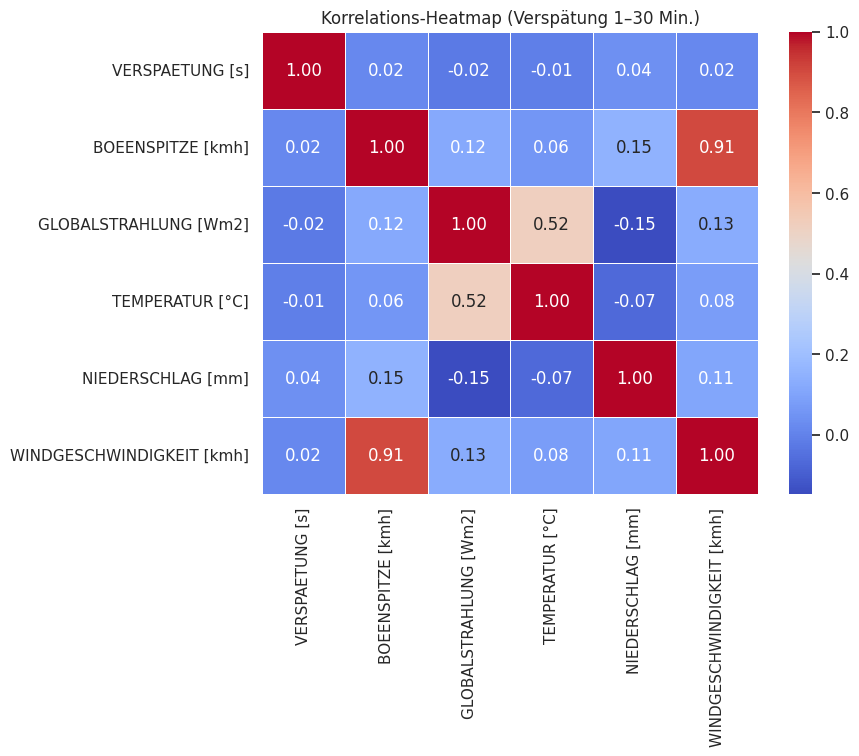

In [54]:
# Nur die gewünschten Spalten auswählen
relevante_spalten = [
    'VERSPAETUNG [s]',
    'BOEENSPITZE [kmh]',
    'GLOBALSTRAHLUNG [Wm2]',
    'TEMPERATUR [°C]',
    'NIEDERSCHLAG [mm]',
    'WINDGESCHWINDIGKEIT [kmh]',

]

# Schritt 1: Nur Zeilen mit vollständigen Daten und Verspätung im gewünschten Bereich
df_filtered = df[relevante_spalten].dropna()
df_filtered = df_filtered[(df_filtered['VERSPAETUNG [s]'] >= 60) & (df_filtered['VERSPAETUNG [s]'] <= 1800)]

# Schritt 2: Korrelation berechnen
korrelation = df_filtered.corr(numeric_only=True)

# Schritt 3: Heatmap zeichnen
plt.figure(figsize=(8, 6))
sns.heatmap(korrelation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korrelations-Heatmap (Verspätung 1–30 Min.)')
plt.show()

##Erkenntnisse aus der Analyse##

Die Ergebnisse zeigen, dass keiner der untersuchten Wetterparameter einen nennenswerten linearen Zusammenhang mit der Verspätung aufweist. Die höchsten Korrelationskoeffizienten zur Verspätung liegen bei:

* Niederschlag (r = 0.04)

* Böenspitze (r = 0.02)

* Windgeschwindigkeit (r = 0.02)

Diese Werte sind jedoch so gering, dass sie statistisch keine relevante Aussagekraft besitzen. Damit lässt sich schliessen, dass weder Wind, Temperatur, Sonneneinstrahlung noch Niederschlag einen direkten linearen Einfluss auf die Verspätungshöhe ausüben.

Auffällig ist hingegen die sehr starke Korrelation zwischen Böenspitze und Windgeschwindigkeit (r = 0.91) sowie die mittlere Korrelation zwischen Temperatur und Globalstrahlung (r = 0.52), was physikalisch zu erwarten ist. Diese Zusammenhänge bestätigen die Konsistenz der Wetterdaten, liefern jedoch keine direkten Hinweise auf wetterbedingte Verspätungen.

Da die linearen Korrelationen keine signifikanten Beziehungen zeigen, könnten nicht-lineare Effekte oder Kombinationen mehrerer Wetterfaktoren eine Rolle spielen. Auch externe Einflussgrößen wie Tageszeit, Verkehrsdichte oder betriebliche Abläufe sollten in weiteren Analysen berücksichtigt werden.



##Ausschluss von Schnee-, Nebel- und Hageldaten aus der Korrelationsanalyse
Einige Wetterparameter wie Schneehöhe, Nebel und Hagel wurden bewusst nicht in die Korrelations-Heatmap aufgenommen, da ihre Datenstruktur und Verteilung eine sinnvolle Interpretation im Rahmen einer linearen Korrelationsanalyse nicht zulassen.

Die Variable Schneehöhe wies über das gesamte Jahr hinweg in der überwiegenden Mehrheit der Fälle den Wert 0 cm auf, da Schneefall nur an sehr wenigen Tagen überhaupt vorkam. Diese extrem einseitige Verteilung mit nahezu ausschließlich Nullwerten führt dazu, dass der Korrelationskoeffizient mathematisch kaum zuverlässig berechnet werden kann, da keine ausreichende Varianz vorhanden ist. Eine Einbindung würde statistisch verzerrte oder bedeutungslose Ergebnisse liefern.

Ähnlich verhält es sich mit den binären Indikatorvariablen Hagel und Nebel, die lediglich den Wert 1 (ja) oder 0 (nein) annehmen. Zwar lässt sich für binäre Variablen grundsätzlich eine Punkt-biseriale Korrelation berechnen, jedoch haben diese Variablen in der Praxis eine extrem ungleiche Verteilung: Tage mit Hagel sind sehr selten, und selbst Nebel tritt im Vergleich zu normalen Wetterlagen deutlich seltener auf. Aufgrund dieser Ungleichverteilung kann keine verlässliche lineare Beziehung zur Verspätung abgeleitet werden – entweder fehlt es an statistischer Aussagekraft oder es kommt rechnerisch zu undefinierten Ergebnissen (z. B. NaN bei der Korrelationsberechnung).

Aus diesen Gründen wurden diese Parameter von der Korrelations-Heatmap ausgeschlossen, um Verzerrungen zu vermeiden und die Analyse auf ausreichend häufig auftretende und kontinuierlich messbare Wettergrössen zu konzentrieren.

In [44]:
from scipy.stats import pointbiserialr

In [45]:
# Schritt 1: Schneehöhe binär umwandeln
df['SCHNEE_VORHANDEN'] = df['SCHNEEHOEHE_MORGENMESSUNG_6_UTC [cm]'].apply(lambda x: 1 if x > 0 else 0)

# Schritt 2: Punkt-biseriale Korrelation berechnen
# Zielvariable
y = df['VERSPAETUNG [s]']

# Binäre Merkmale
binary_vars = ['SCHNEE_VORHANDEN', 'TAG_MIT_HAGEL', 'TAG_MIT_NEBEL']

# Ergebnisse sammeln
print("Punkt-biseriale Korrelationen mit 'VERSPAETUNG [s]':\n")
for var in binary_vars:
    corr, pval = pointbiserialr(df[var], y)
    print(f"{var}: r = {corr:.3f}, p = {pval:.4f}")

Punkt-biseriale Korrelationen mit 'VERSPAETUNG [s]':

SCHNEE_VORHANDEN: r = 0.037, p = 0.0000
TAG_MIT_HAGEL: r = nan, p = nan
TAG_MIT_NEBEL: r = nan, p = nan


r = 0.037: Es besteht ein sehr schwacher positiver Zusammenhang zwischen Schneevorkommen und Zugverspätung. Das heisst:

An Tagen mit Schnee sind die Verspätungen tendenziell leicht höher, aber der Effekt ist sehr gering.

p = 0.0000: Der Zusammenhang ist statistisch signifikant (p < 0.05), was bei grossen Datensätzen auch bei kleinen Effekten häufig vorkommt.

Auch wenn der Zusammenhang signifikant ist, ist er praktisch vernachlässigbar gering.

In [48]:
print(df['TAG_MIT_HAGEL'].value_counts())
print(df['TAG_MIT_NEBEL'].value_counts())

TAG_MIT_HAGEL
0.0    12155710
1.0       40216
Name: count, dtype: int64
TAG_MIT_NEBEL
0.0    10829635
1.0     1366291
Name: count, dtype: int64


In [49]:
print("TAG_MIT_HAGEL == 1:")
print(df[df['TAG_MIT_HAGEL'] == 1]['VERSPAETUNG [s]'].describe())

print("\nTAG_MIT_NEBEL == 1:")
print(df[df['TAG_MIT_NEBEL'] == 1]['VERSPAETUNG [s]'].describe())

TAG_MIT_HAGEL == 1:
count    40216.000000
mean       138.723344
std        105.662004
min         61.000000
25%         81.000000
50%        107.000000
75%        156.000000
max       1712.000000
Name: VERSPAETUNG [s], dtype: float64

TAG_MIT_NEBEL == 1:
count    1.366291e+06
mean     1.250825e+02
std      8.748507e+01
min      6.100000e+01
25%      7.700000e+01
50%      1.000000e+02
75%      1.420000e+02
max      1.799000e+03
Name: VERSPAETUNG [s], dtype: float64
